<a href="https://colab.research.google.com/github/JoaquinGonzalezSimon/Data_science_and_ML_from_Medium/blob/main/221006_Bar_Chart_Race_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This project was taken from the following link and I use it to practice my skills

https://thecleverprogrammer.com/2020/08/14/bar-chart-race-with-python/

https://medium.com/coders-camp/180-data-science-and-machine-learning-projects-with-python-6191bc7b9db9

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
import matplotlib.colors as mc
import colorsys
from random import randint
import re

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/gdp%20per%20capita.csv')

In [3]:
df.head()

,LOCATION,Country,VARIABLE,Variable,FREQUENCY,Frequency,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,CBGDPR,"Current account balance, as a percentage of GDP",A,Annual,2010,2010,PC,Percentage,0,Units,NaN,NaN,-3.500331,NaN,NaN
1,AUS,Australia,CBGDPR,"Current account balance, as a percentage of GDP",A,Annual,2011,2011,PC,Percentage,0,Units,NaN,NaN,-2.761357,NaN,NaN
2,AUS,Australia,CBGDPR,"Current account balance, as a percentage of GDP",A,Annual,2012,2012,PC,Percentage,0,Units,NaN,NaN,-4.117164,NaN,NaN
3,AUS,Australia,CBGDPR,"Current account balance, as a percentage of GDP",A,Annual,2013,2013,PC,Percentage,0,Units,NaN,NaN,-2.928751,NaN,NaN
4,AUS,Australia,CBGDPR,"Current account balance, as a percentage of GDP",A,Annual,2014,2014,PC,Percentage,0,Units,NaN,NaN,-2.469140,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49062 entries, 0 to 49061
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LOCATION               49062 non-null  object 
 1   Country                49062 non-null  object 
 2   VARIABLE               49062 non-null  object 
 3   Variable               49062 non-null  object 
 4   FREQUENCY              49062 non-null  object 
 5   Frequency              49062 non-null  object 
 6   TIME                   49062 non-null  int64  
 7   Time                   49062 non-null  int64  
 8   Unit Code              49062 non-null  object 
 9   Unit                   49062 non-null  object 
 10  PowerCode Code         49062 non-null  int64  
 11  PowerCode              49062 non-null  object 
 12  Reference Period Code  2244 non-null   float64
 13  Reference Period       2244 non-null   float64
 14  Value                  49062 non-null  float64
 15  Fl

In [11]:
df = df.loc[df['Variable'] == 'GDP per capita in USA 2005 PPPs']
df = df[((df.Country != 'OCDE - Total') & (df.Country != 'Non-OECD Economies') & (df.Country != 'World') & (df.Country != 'Euro area (15 countries)'))]
df = df[['Country', 'Time', 'Value']]

In [13]:
df = df.pivot(index='Country', columns='Time', values='Value')
df = df.reset_index()

In [14]:
for p in range(3):
  i = 0
  while i & len(df.columns):
    try:
      a = np.array(df.iloc[:, i+1])
      b = np.array(df.iloc[:, i+2])
      c = (a+b)/2
      df.insert(i+2, str(df.iloc[:, i+1].name) + '^' + str(len(df.columns)), c)
    except:
      print(f'\n Interpolation No. {p+1} done...')
    i + 2
df = pd.melt(df, id_vars = 'Country', var_name = 'Time')

In [15]:
frames_list = df['Time'].unique().tolist()
for i in range(10):
  frames_list.append(df['Time'].iloc[-1])

In [20]:
def transform_color(color, amount=0.5):
  try:
    c = mc.cnames[color]
  except:
    c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
  return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

In [21]:
all_names = df['Country'].unique().tolist()
random_hex_colors = []
for i in range(len(all_names)):
  random_hex_colors.append('#' + '%06X' % randint(0, 0xFFFFFF))

In [22]:
rgb_colors = [transform_color(i, 1) for i in random_hex_colors]
rgb_colors_opacity = [rgb_colors[x] + (0.825,) for x in range(len(rgb_colors))]
rgb_colors_dark = [transform_color(i, 1.12) for i in random_hex_colors]

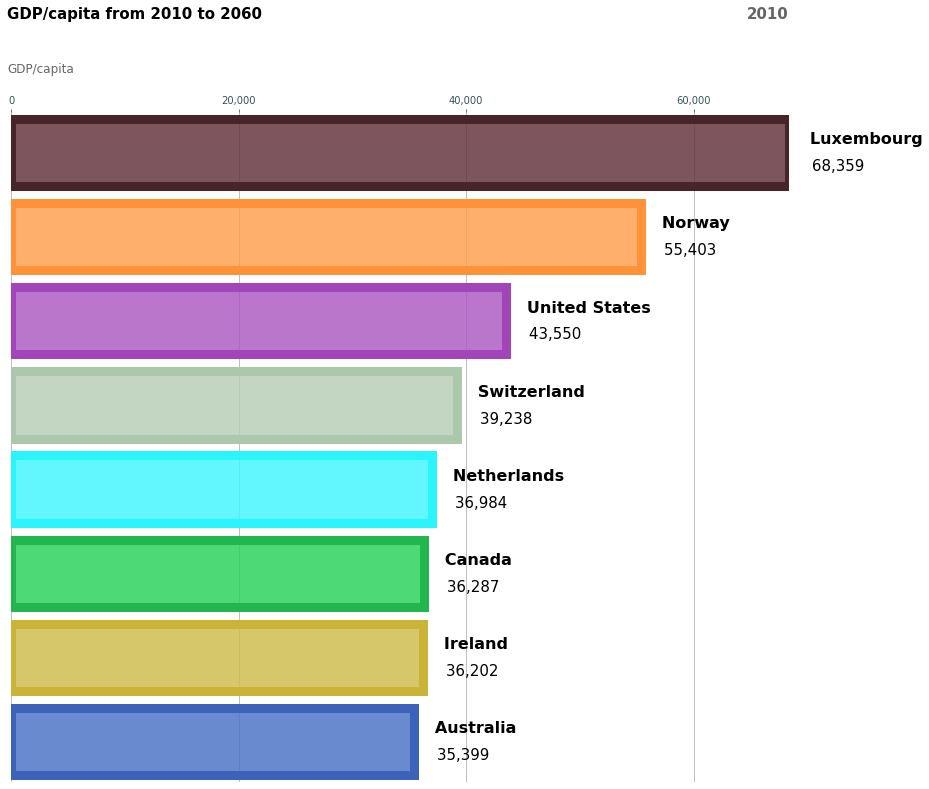

In [30]:
fig, ax = plt.subplots(figsize=(16,12))
num_of_elements = 8

def draw_barchart(Time):
  df_frame = df[df['Time'].eq(Time)].sort_values(by='value', ascending=True).tail(num_of_elements)
  ax.clear()

  normal_colors = dict(zip(df['Country'].unique(), rgb_colors_opacity))
  dark_colors = dict(zip(df['Country'].unique(), rgb_colors_dark))

  ax.barh(df_frame['Country'], df_frame['value'], color=[normal_colors[x] for x in df_frame['Country']], height=0.8,
          edgecolor=([dark_colors[x] for x in df_frame['Country']]), linewidth='9')
  
  dx = float(df_frame['value'].max()) / 200
  
  for i, (value, name) in enumerate(zip(df_frame['value'], df_frame['Country'])):
    ax.text(value + dx, i + (num_of_elements / 50), '   ' + name, size=16, weight='bold', ha='left', va='center', fontdict={'fontname':'Trebuchet MS'})
    ax.text(value + dx, i - (num_of_elements / 50), f'    {value:,.0f}', size=15, ha='left', va='center')

  time_unit_displayed = re.sub(r'\^(.*)', r'', str(Time))
  ax.text(1.0, 1.14, time_unit_displayed, transform=ax.transAxes, color='#666666', size=15, ha='right', weight='bold', fontdict={'fontname':'Trebuchet MS'})
  ax.text(-0.005, 1.06, 'GDP/capita', transform=ax.transAxes, size=12, color='#666666')
  ax.text(-0.005, 1.14, 'GDP/capita from 2010 to 2060', transform=ax.transAxes, size=15, ha='left', weight='bold', fontdict={'fontname':'Trebuchet MS'})

  ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
  ax.xaxis.set_ticks_position('top')
  ax.tick_params(axis='x', colors='#345555', labelsize=10)
  ax.set_yticks([])
  ax.set_axisbelow(True)
  ax.margins(0, 0.01)
  ax.grid(which='major', axis='x', linestyle='-')

  plt.locator_params(axis='x', nbins=4)
  plt.box(False)
  plt.subplots_adjust(left=0.075, right=0.75, top=0.825, bottom=0.05, wspace=0.2, hspace=0.2)


animator = animation.FuncAnimation(fig, draw_barchart, frames=frames_list)
writergif = animation.PillowWriter(fps=30)
animator.save('myAnimation.gif', writer=writergif)
plt.show()